In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict
import matplotlib.ticker as mtick

Carmelo Anthony (Non-Battier games -- 202 games): 25.8 ppg & 55% TS, Carmelo Anthony (Battier Games -- 6 games): 24.3 ppg & 47.6% TS

Joe Johnson (Non-Battier games -- 213 games): 22.5 ppg & 54.2 % TS, Joe Johnson (Battier games -- 5 games): 20 ppg & 50.1 % TS

LeBron James (Non-Battier games -- 228 games): 28.6 ppg & 57.2% TS, LeBron James (Battier games): 26.5 ppg & 51.8% TS

Kobe Bryant (Non-Battier games -- 231 games): 28.6 ppg & 57.6% TS, Kobe Bryant (Battier games -- 10 games): 33.8 ppg & 52% TS

Dwyane Wade (Non-Battier games -- 176 games): 27.8 ppg & 56.9% TS, Dwyane Wade (Battier games -- 5 games): 27.6 ppg & 51.4% TS

Paul Pierce (Non-Battier games -- 204 games): 21.6 ppg & 58.7 % TS, Paul Pierce (Battier games -- 4 games): 21.8 ppg & 56.7% TS

Vince Carter (Non-Battier games -- 232 games): 22.6 ppg & 55.4% TS, Vince Carter (Battier games -- 6 games): 18.5 ppg & 45.1% TS

Brandon Roy (Non-Battier games -- 200 games): 19.9 PPG & 55.4% TS, Brandon Roy (Battier games -- 9 games): 18.4 ppg & 51.6% TS

In [2]:
battier_data = [
    {
        'name': 'Carmelo Anthony',
        'num_games': 6,
        'ppg': 24.3,
        'ts_pct': 47.6
    },
    {
        'name': 'Joe Johnson',
        'num_games': 5,
        'ppg': 20,
        'ts_pct': 50.1
    },
    {
        'name': 'LeBron James',
        'num_games': 6,
        'ppg': 26.5,
        'ts_pct': 51.8
    },
    {
        'name': 'Kobe Bryant',
        'num_games': 10,
        'ppg': 33.8,
        'ts_pct': 52
    },
    {
        'name': 'Dwyane Wade',
        'num_games': 5,
        'ppg': 27.6,
        'ts_pct': 51.4
    },
    {
        'name': 'Paul Pierce',
        'num_games': 4,
        'ppg': 21.8,
        'ts_pct': 56.7
    },
    {
        'name': 'Vince Carter',
        'num_games': 6,
        'ppg': 18.5,
        'ts_pct': 45.1
    },
    {
        'name': 'Brandon Roy',
        'num_games': 9,
        'ppg': 18.4,
        'ts_pct': 51.6
    }
]

Carmelo Anthony (Non-Battier games -- 202 games): 25.8 ppg & 55% TS, Carmelo Anthony (Battier Games -- 6 games): 24.3 ppg & 47.6% TS

Joe Johnson (Non-Battier games -- 213 games): 22.5 ppg & 54.2 % TS, Joe Johnson (Battier games -- 5 games): 20 ppg & 50.1 % TS

LeBron James (Non-Battier games -- 228 games): 28.6 ppg & 57.2% TS, LeBron James (Battier games): 26.5 ppg & 51.8% TS

Kobe Bryant (Non-Battier games -- 231 games): 28.6 ppg & 57.6% TS, Kobe Bryant (Battier games -- 10 games): 33.8 ppg & 52% TS

Dwyane Wade (Non-Battier games -- 176 games): 27.8 ppg & 56.9% TS, Dwyane Wade (Battier games -- 5 games): 27.6 ppg & 51.4% TS

Paul Pierce (Non-Battier games -- 204 games): 21.6 ppg & 58.7 % TS, Paul Pierce (Battier games -- 4 games): 21.8 ppg & 56.7% TS

Vince Carter (Non-Battier games -- 232 games): 22.6 ppg & 55.4% TS, Vince Carter (Battier games -- 6 games): 18.5 ppg & 45.1% TS

Brandon Roy (Non-Battier games -- 200 games): 19.9 PPG & 55.4% TS, Brandon Roy (Battier games -- 9 games): 18.4 ppg & 51.6% TS

In [3]:
non_battier_data = [
    {
        'name': 'Carmelo Anthony',
        'num_games': 202,
        'ppg': 25.8,
        'ts_pct': 55
    },
    {
        'name': 'Joe Johnson',
        'num_games': 213,
        'ppg': 22.5,
        'ts_pct': 54.2
    },
    {
        'name': 'LeBron James',
        'num_games': 228,
        'ppg': 28.6,
        'ts_pct': 57.2
    },
    {
        'name': 'Kobe Bryant',
        'num_games': 231,
        'ppg': 28.6,
        'ts_pct': 57.6
    },
    {
        'name': 'Dwyane Wade',
        'num_games': 176,
        'ppg': 27.8,
        'ts_pct': 56.9
    },
    {
        'name': 'Paul Pierce',
        'num_games': 204,
        'ppg': 21.6,
        'ts_pct': 58.7
    },
    {
        'name': 'Vince Carter',
        'num_games': 232,
        'ppg': 22.6,
        'ts_pct': 55.4
    },
    {
        'name': 'Brandon Roy',
        'num_games': 200,
        'ppg': 19.9,
        'ts_pct': 55.4
    }
]

In [4]:
battier_df = pd.DataFrame(battier_data)

In [5]:
non_battier_df = pd.DataFrame(non_battier_data)

In [6]:
merged_df = pd.merge(left=battier_df, right=non_battier_df, on='name', suffixes=['_battier', '_non_battier'])

In [7]:
merged_df

,name,num_games_battier,ppg_battier,ts_pct_battier,num_games_non_battier,ppg_non_battier,ts_pct_non_battier
0,Carmelo Anthony,6,24.3,47.6,202,25.8,55.0
1,Joe Johnson,5,20.0,50.1,213,22.5,54.2
2,LeBron James,6,26.5,51.8,228,28.6,57.2
3,Kobe Bryant,10,33.8,52.0,231,28.6,57.6
4,Dwyane Wade,5,27.6,51.4,176,27.8,56.9
5,Paul Pierce,4,21.8,56.7,204,21.6,58.7
6,Vince Carter,6,18.5,45.1,232,22.6,55.4
7,Brandon Roy,9,18.4,51.6,200,19.9,55.4


In [8]:
plt.style.use('fivethirtyeight')

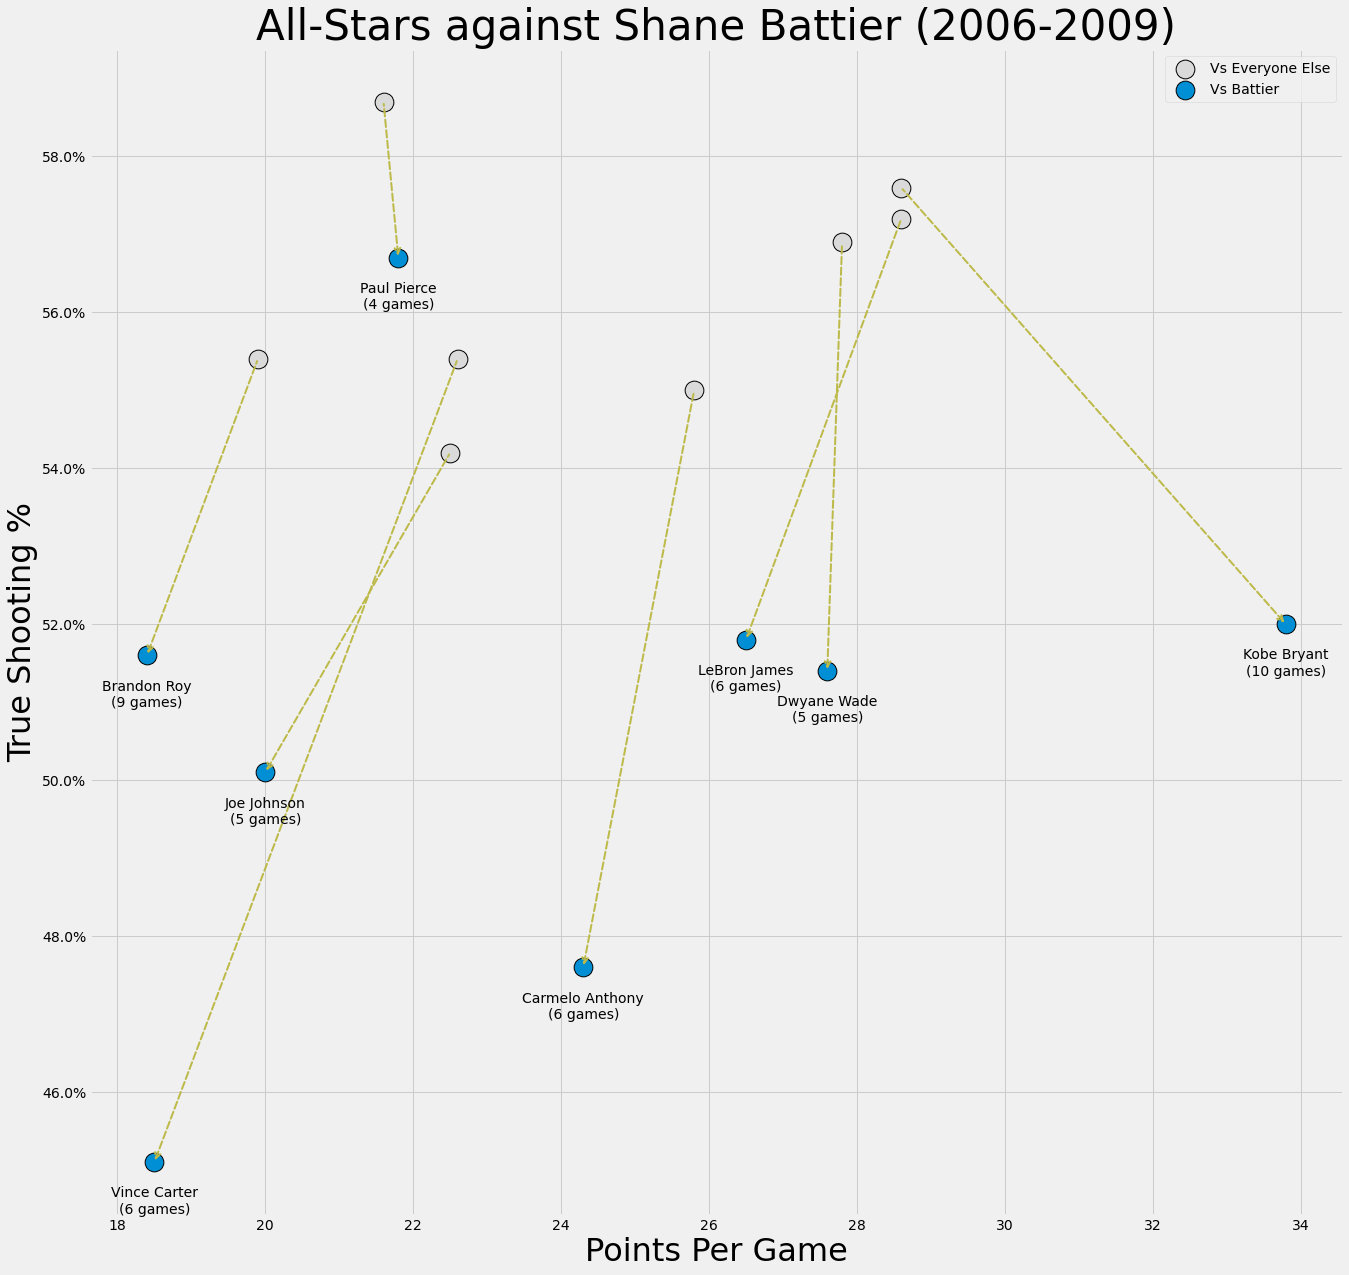

In [14]:

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=merged_df.ppg_non_battier, y=merged_df.ts_pct_non_battier, s=350, color='#DADADA', lw=1, edgecolors='black', label='Vs Everyone Else')
ax.scatter(x=merged_df.ppg_battier, y=merged_df.ts_pct_battier, s=350, lw=1, edgecolors='black', label='Vs Battier')
ax.set_xlabel('Points Per Game', size=32)
ax.set_ylabel('True Shooting %', size=32)
ax.set_title("All-Stars against Shane Battier (2006-2009)", size=42)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    ax.annotate(
        "",
        xy=(item.ppg_non_battier, item.ts_pct_non_battier), xytext=(item.ppg_battier, item.ts_pct_battier),
        arrowprops=dict(arrowstyle="<-", ls='--', lw=2, color='#bdba4a'),
    )
ax.legend()
texts = []
for i in range(len(merged_df)):
    item = merged_df.iloc[i]
    texts.append(ax.text(x=item.ppg_battier, y=item.ts_pct_battier-0.5, s=f"{item['name']}\n({item.num_games_battier} games)", size=14, ha='center', va='center'))
#adjust_text(texts, expand_objects=(1.4, 1.4))